In [1]:
# All necessary imports for SVM classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#Data preparation

team_number = 0
team_dict = dict()
matches_df = pd.read_csv('/Users/rahulomalur/Desktop/Sem 5/ML/ML Project/ELO-Insights/training_dataset.csv')
for team in list(set(matches_df['Home Team'])):
    if team not in team_dict:
        team_number += 1
        team_dict[team] = team_number
matches_df.drop(columns=['Date', 'Home Goals', 'Away Goals'], inplace=True)

matches_df['Home Team'] = matches_df['Home Team'].map(team_dict)
matches_df['Away Team'] = matches_df['Away Team'].map(team_dict)

matches_df.head()

,Home Team,Away Team,Home_Team_Rating,Away_Team_Rating,Winner
0,13,15,1516,1484,1
1,26,25,1516,1484,1
2,46,3,1516,1484,1
3,30,36,1500,1500,0
4,40,39,1484,1516,-1


In this notebook we will just be dealing with SVM classification using just the teams and their respective ELO ratings as the features.

In [3]:
#Train & Test separation
Y = np.array(matches_df['Winner'])
print(Y)
X_df = matches_df[['Home Team', 'Away Team', 'Home_Team_Rating', 'Away_Team_Rating']]
X = np.array(X_df)
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

[ 1  1  1 ...  1 -1  1]
[[-1.07995389 -0.93036852  1.09438528  0.9846141 ]
 [-0.10764898 -0.18244166  1.09438528  0.9846141 ]
 [ 1.38820473 -1.82788074  1.09438528  0.9846141 ]
 ...
 [ 0.41589982  1.08903399 -1.21966861 -1.30560492]
 [-0.10764898  1.01424131 -2.0797253  -1.35967417]
 [-1.22953926  1.61258279 -1.48192805 -0.42891062]]


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fitting the SVM model to our data
svm_model = SVC(kernel='rbf', decision_function_shape='ovr')


svm_model.fit(X_train, Y_train)

# Obtaining predictions
Y_pred = svm_model.predict(X_test)




Accuracy: 0.56
              precision    recall  f1-score   support

          -1       0.52      0.55      0.54       684
           0       0.17      0.01      0.01       587
           1       0.58      0.85      0.69      1135

    accuracy                           0.56      2406
   macro avg       0.42      0.47      0.41      2406
weighted avg       0.46      0.56      0.48      2406



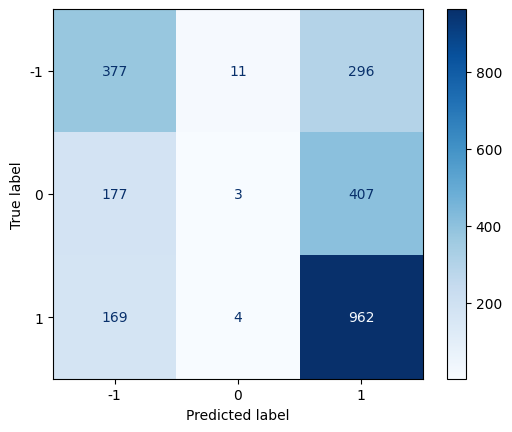

In [5]:
# Evaluation metrics on the test set
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


classification_report_str = classification_report(Y_test, Y_pred)
print(classification_report_str)

cm = confusion_matrix(Y_test, Y_pred, labels=np.unique(Y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

The accuracy we have attained is very less and virtually meaningless for the draws as almost none are classified correctly so for some Analysis we will filter the dataset to include only wins and losses and see what happens.